<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Takashimaya_Ground_Floor_Plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

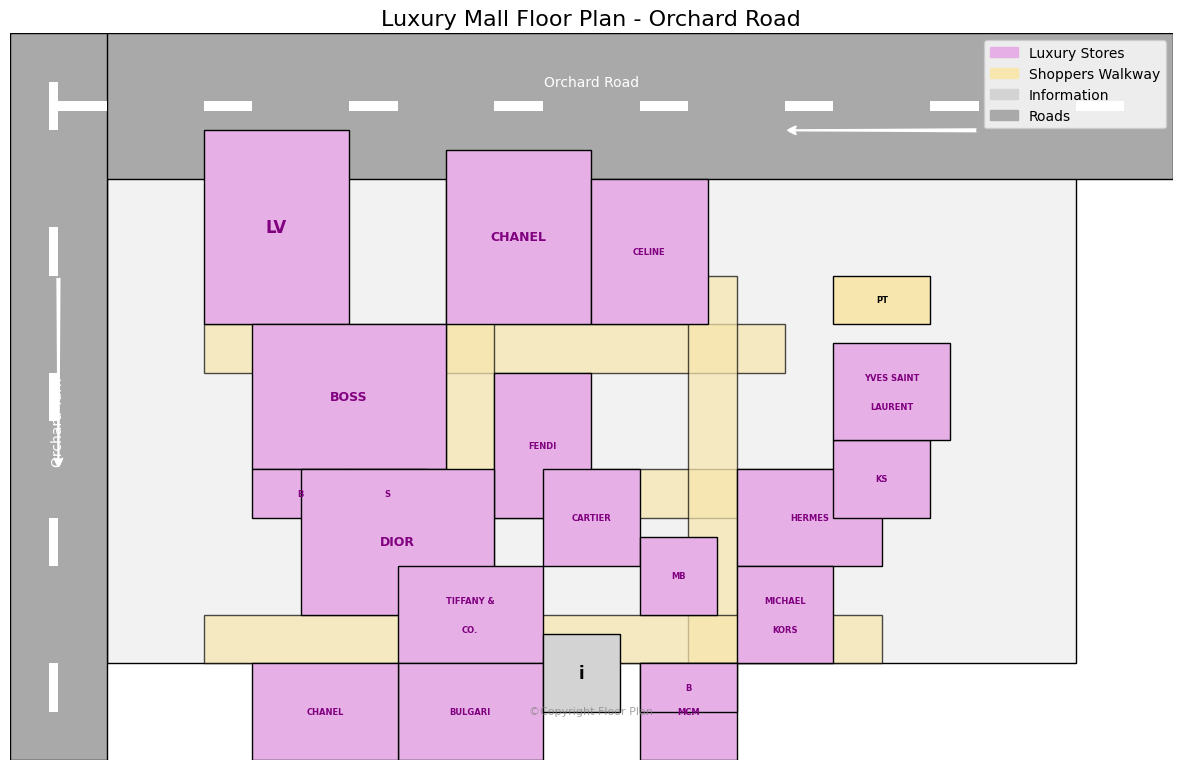

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.colors import to_rgba

class LuxuryMallLayout:
    def __init__(self):
        # Define the main mall outline
        self.mall_width = 100
        self.mall_height = 70
        self.mall_origin = (10, 10)

        # Define the store locations and sizes
        # Format: (name, x, y, width, height, color)
        self.stores = [
            ("LOUIS VUITTON", 20, 45, 15, 20, "#e6b0e6"),
            ("CHANEL", 45, 45, 15, 18, "#e6b0e6"),
            ("CELINE", 60, 45, 12, 15, "#e6b0e6"),
            ("BOSS", 25, 30, 20, 15, "#e6b0e6"),
            ("BERLUTI", 25, 25, 10, 5, "#e6b0e6"),
            ("SINCERE", 35, 25, 8, 5, "#e6b0e6"),
            ("FENDI", 50, 25, 10, 15, "#e6b0e6"),
            ("DIOR", 30, 15, 20, 15, "#e6b0e6"),
            ("TIFFANY & CO.", 40, 10, 15, 10, "#e6b0e6"),
            ("CARTIER", 55, 20, 10, 10, "#e6b0e6"),
            ("MONT BLANC", 65, 15, 8, 8, "#e6b0e6"),
            ("HERMES", 75, 20, 15, 10, "#e6b0e6"),
            ("BULGARI", 40, 0, 15, 10, "#e6b0e6"),
            ("CHANEL", 25, 0, 15, 10, "#e6b0e6"),
            ("PITA TREE", 85, 45, 10, 5, "#f7e6ad"),
            ("MCM", 65, 0, 10, 10, "#e6b0e6"),
            ("BALLY", 65, 5, 10, 5, "#e6b0e6"),
            ("KATE SPADE", 85, 25, 10, 8, "#e6b0e6"),
            ("YVES SAINT LAURENT", 85, 33, 12, 10, "#e6b0e6"),
            ("MICHAEL KORS", 75, 10, 10, 10, "#e6b0e6"),
            ("INFORMATION", 55, 5, 8, 8, "#d3d3d3")
        ]

        # Define the roads
        self.roads = [
            # Orchard Road
            (0, 60, 120, 15, "#a9a9a9"),
            # Orchard Turn
            (0, 0, 10, 75, "#a9a9a9")
        ]

        # Define walkways/corridors
        self.walkways = [
            (20, 40, 60, 5, "#f7e6ad"),  # Main horizontal walkway
            (45, 10, 5, 50, "#f7e6ad"),  # Main vertical walkway
            (50, 25, 40, 5, "#f7e6ad"),  # Right side walkway
            (70, 10, 5, 40, "#f7e6ad"),  # Far right vertical walkway
            (20, 10, 25, 5, "#f7e6ad"),  # Bottom walkway
            (50, 10, 40, 5, "#f7e6ad")   # Bottom right walkway
        ]

    def draw_layout(self):
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(15, 10))

        # Draw the mall outline
        mall_rect = patches.Rectangle(
            self.mall_origin, self.mall_width, self.mall_height,
            linewidth=1, edgecolor='black', facecolor='#f2f2f2'
        )
        ax.add_patch(mall_rect)

        # Draw the roads
        for x, y, width, height, color in self.roads:
            road = patches.Rectangle(
                (x, y), width, height,
                linewidth=1, edgecolor='black', facecolor=color
            )
            ax.add_patch(road)

        # Draw road markings
        self.draw_road_markings(ax)

        # Draw the walkways
        for x, y, width, height, color in self.walkways:
            walkway = patches.Rectangle(
                (x, y), width, height,
                linewidth=1, edgecolor='black', facecolor=color, alpha=0.7
            )
            ax.add_patch(walkway)

        # Draw the stores
        for name, x, y, width, height, color in self.stores:
            store = patches.Rectangle(
                (x, y), width, height,
                linewidth=1, edgecolor='black', facecolor=color
            )
            ax.add_patch(store)

            # Add store name
            if name == "LOUIS VUITTON":
                ax.text(x + width/2, y + height/2, "LV",
                        ha='center', va='center', fontsize=12, fontweight='bold', color='purple')
            elif name == "INFORMATION":
                ax.text(x + width/2, y + height/2, "i",
                        ha='center', va='center', fontsize=12, fontweight='bold')
            else:
                # Adjust text size based on store size
                text_size = min(9, max(6, (width * height) / 30))

                # Determine if full name or abbreviation should be used
                if width * height < 100:
                    # Use first letters of words for small stores
                    abbr = ''.join([word[0] for word in name.split()])
                    ax.text(x + width/2, y + height/2, abbr,
                            ha='center', va='center', fontsize=text_size, fontweight='bold',
                            color='purple' if name not in ["PITA TREE", "INFORMATION"] else 'black')
                else:
                    lines = []
                    words = name.split()
                    current_line = words[0]

                    for word in words[1:]:
                        if len(current_line + " " + word) <= 10:
                            current_line += " " + word
                        else:
                            lines.append(current_line)
                            current_line = word

                    lines.append(current_line)

                    for i, line in enumerate(lines):
                        offset = (len(lines) - 1) * 0.5 - i
                        ax.text(x + width/2, y + height/2 + offset * 3, line,
                                ha='center', va='center', fontsize=text_size, fontweight='bold',
                                color='purple' if name not in ["PITA TREE", "INFORMATION"] else 'black')

        # Set the aspect ratio to be equal
        ax.set_aspect('equal')

        # Set the limits of the plot
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 75)

        # Add title
        ax.set_title('Luxury Mall Floor Plan - Orchard Road', fontsize=16)

        # Add a legend
        luxury_patch = patches.Patch(color='#e6b0e6', label='Luxury Stores')
        walkway_patch = patches.Patch(color='#f7e6ad', label='Shoppers Walkway')
        info_patch = patches.Patch(color='#d3d3d3', label='Information')
        road_patch = patches.Patch(color='#a9a9a9', label='Roads')
        ax.legend(handles=[luxury_patch, walkway_patch, info_patch, road_patch],
                  loc='upper right', bbox_to_anchor=(1, 1))

        # Add a watermark
        ax.text(60, 5, "©Copyright Floor Plan", fontsize=8, color='gray',
                ha='center', va='center', alpha=0.7)

        # Hide the axes
        ax.axis('off')

        return fig, ax

    def draw_road_markings(self, ax):
        # Draw road markings on Orchard Road
        for i in range(5, 120, 15):
            marking = patches.Rectangle(
                (i, 67), 5, 1,
                linewidth=1, edgecolor='none', facecolor='white'
            )
            ax.add_patch(marking)

        # Draw road markings on Orchard Turn
        for i in range(5, 70, 15):
            marking = patches.Rectangle(
                (4, i), 1, 5,
                linewidth=1, edgecolor='none', facecolor='white'
            )
            ax.add_patch(marking)

        # Add road labels
        ax.text(60, 70, "Orchard Road", fontsize=10, rotation=0,
                ha='center', va='center', color='white')
        ax.text(5, 35, "Orchard Turn", fontsize=10, rotation=90,
                ha='center', va='center', color='white')

        # Add arrows to indicate direction
        arrow_style = patches.ArrowStyle.Fancy(head_length=6, head_width=6, tail_width=2)

        # Orchard Road arrow
        orchard_arrow = patches.FancyArrowPatch(
            (100, 65), (80, 65),
            arrowstyle=arrow_style, color='white'
        )
        ax.add_patch(orchard_arrow)

        # Orchard Turn arrows
        turn_arrow1 = patches.FancyArrowPatch(
            (5, 50), (5, 30),
            arrowstyle=arrow_style, color='white'
        )
        ax.add_patch(turn_arrow1)

    def generate_legend(self):
        """Generate a separate legend image"""
        fig, ax = plt.subplots(figsize=(8, 4))

        # Create legend items
        stores = [
            ("LOUIS VUITTON", "#e6b0e6"),
            ("CHANEL", "#e6b0e6"),
            ("DIOR", "#e6b0e6"),
            ("HERMES", "#e6b0e6"),
            ("FENDI", "#e6b0e6"),
            ("CARTIER", "#e6b0e6"),
            ("BOSS", "#e6b0e6"),
            ("MONT BLANC", "#e6b0e6"),
            ("BULGARI", "#e6b0e6"),
            ("TIFFANY & CO.", "#e6b0e6"),
            ("PITA TREE", "#f7e6ad"),
            ("INFORMATION", "#d3d3d3")
        ]

        # Arrange stores in a grid
        cols = 3
        rows = (len(stores) + cols - 1) // cols

        for i, (name, color) in enumerate(stores):
            row = i // cols
            col = i % cols

            x = col * 30 + 10
            y = (rows - row - 1) * 20 + 10

            store = patches.Rectangle(
                (x, y), 5, 5,
                linewidth=1, edgecolor='black', facecolor=color
            )
            ax.add_patch(store)

            ax.text(x + 7, y + 2.5, name,
                    ha='left', va='center', fontsize=10)

        # Set the aspect ratio and limits
        ax.set_aspect('equal')
        ax.set_xlim(0, cols * 30 + 10)
        ax.set_ylim(0, rows * 20 + 10)

        # Add title
        ax.set_title('Mall Directory', fontsize=14)

        # Hide the axes
        ax.axis('off')

        return fig, ax

    def save_layout(self, filename='luxury_mall_layout.png'):
        """Save the layout to a file"""
        fig, ax = self.draw_layout()
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close(fig)

        # Save the legend separately
        legend_fig, legend_ax = self.generate_legend()
        plt.savefig('mall_directory.png', dpi=300, bbox_inches='tight')
        plt.close(legend_fig)

        print(f"Layout saved as {filename}")
        print("Legend saved as mall_directory.png")

def main():
    mall = LuxuryMallLayout()
    fig, ax = mall.draw_layout()
    plt.show()

    # Uncomment to save the layout
    # mall.save_layout()

if __name__ == "__main__":
    main()